In [2]:
pip install ucimlrepo

In [3]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00


In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
#print(automobile.metadata)

# variable information
#print(automobile.variables)

df = pd.concat([X,y], axis=1)

In [5]:
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


## Data Cleaning


In [6]:
# Imputing the missing values
df.fillna(df.select_dtypes(np.number).mean(), inplace=True)

In [7]:
# There are no more missing values in the dataframe
df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

In [8]:
# Coverting categorical types into a numerical type
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['fuel-system','engine-type','engine-location','drive-wheels','body-style','aspiration','fuel-type','make']

label_encoder = LabelEncoder()
for column in categorical_columns:
    encoded_column_name = column + '_encoded'
    df[encoded_column_name] = label_encoder.fit_transform(df[column])

In [9]:
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,normalized-losses,symboling,fuel-system_encoded,engine-type_encoded,engine-location_encoded,drive-wheels_encoded,body-style_encoded,aspiration_encoded,fuel-type_encoded,make_encoded
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,122.0,3,5,0,0,2,0,0,1,0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,122.0,3,5,0,0,2,0,0,1,0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,122.0,1,5,5,0,2,2,0,1,0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,164.0,2,5,3,0,1,3,0,1,1
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,164.0,2,5,3,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,95.0,-1,5,3,0,2,3,0,1,21
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,95.0,-1,5,3,0,2,3,1,1,21
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,95.0,-1,5,5,0,2,3,0,1,21
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,95.0,-1,3,3,0,2,3,1,0,21


In [10]:
# Dropping the categorical type in the dataframe for accurat linear regression analysis
categorical_columns = ['fuel-system','engine-type','engine-location','drive-wheels','body-style','aspiration','fuel-type','make']
df = df.drop(columns=categorical_columns,axis=1)
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,...,normalized-losses,symboling,fuel-system_encoded,engine-type_encoded,engine-location_encoded,drive-wheels_encoded,body-style_encoded,aspiration_encoded,fuel-type_encoded,make_encoded
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,122.0,3,5,0,0,2,0,0,1,0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,122.0,3,5,0,0,2,0,0,1,0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,...,122.0,1,5,5,0,2,2,0,1,0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,...,164.0,2,5,3,0,1,3,0,1,1
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,...,164.0,2,5,3,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,141,4,...,95.0,-1,5,3,0,2,3,0,1,21
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,141,4,...,95.0,-1,5,3,0,2,3,1,1,21
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,173,6,...,95.0,-1,5,5,0,2,3,0,1,21
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,145,6,...,95.0,-1,3,3,0,2,3,1,0,21


In [11]:
df.dtypes

price                      float64
highway-mpg                  int64
city-mpg                     int64
peak-rpm                   float64
horsepower                 float64
compression-ratio          float64
stroke                     float64
bore                       float64
engine-size                  int64
num-of-cylinders             int64
curb-weight                  int64
height                     float64
width                      float64
length                     float64
wheel-base                 float64
num-of-doors               float64
normalized-losses          float64
symboling                    int64
fuel-system_encoded          int64
engine-type_encoded          int64
engine-location_encoded      int64
drive-wheels_encoded         int64
body-style_encoded           int64
aspiration_encoded           int64
fuel-type_encoded            int64
make_encoded                 int64
dtype: object

In [12]:
df.shape

(205, 26)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    205 non-null    float64
 1   highway-mpg              205 non-null    int64  
 2   city-mpg                 205 non-null    int64  
 3   peak-rpm                 205 non-null    float64
 4   horsepower               205 non-null    float64
 5   compression-ratio        205 non-null    float64
 6   stroke                   205 non-null    float64
 7   bore                     205 non-null    float64
 8   engine-size              205 non-null    int64  
 9   num-of-cylinders         205 non-null    int64  
 10  curb-weight              205 non-null    int64  
 11  height                   205 non-null    float64
 12  width                    205 non-null    float64
 13  length                   205 non-null    float64
 14  wheel-base               2

In [14]:
df.corr()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,...,normalized-losses,symboling,fuel-system_encoded,engine-type_encoded,engine-location_encoded,drive-wheels_encoded,body-style_encoded,aspiration_encoded,fuel-type_encoded,make_encoded
price,1.000000,-0.690526,-0.667449,-0.100854,0.757917,0.070990,0.082095,0.532300,0.861752,0.687770,...,1.339987e-01,-0.082201,0.516533,0.071535,3.310129e-01,0.576866,-0.072677,0.177285,-0.110207,-0.161471
highway-mpg,-0.690526,1.000000,0.971337,-0.054257,-0.770903,0.265201,-0.043961,-0.586992,-0.677470,-0.466666,...,-1.782209e-01,0.034606,-0.645659,-0.078456,-1.020262e-01,-0.452220,-0.007170,-0.254416,-0.191392,0.050022
city-mpg,-0.667449,0.971337,1.000000,-0.113723,-0.803162,0.324701,-0.042179,-0.584508,-0.653658,-0.445837,...,-2.187488e-01,-0.035823,-0.671581,-0.085004,-1.534875e-01,-0.449581,0.031697,-0.202362,-0.255963,0.053642
peak-rpm,-0.100854,-0.054257,-0.113723,1.000000,0.130971,-0.435936,-0.066844,-0.254761,-0.244599,-0.124358,...,2.377476e-01,0.273679,0.014714,0.005592,1.984002e-01,-0.039724,-0.109410,-0.183629,0.477060,-0.218342
horsepower,0.757917,-0.770903,-0.803162,0.130971,1.000000,-0.205740,0.088264,0.575737,0.810713,0.691208,...,2.034339e-01,0.071389,0.659120,0.010258,3.176101e-01,0.516936,-0.152438,0.240182,0.165190,-0.053654
compression-ratio,0.070990,0.265201,0.324701,-0.435936,-0.205740,1.000000,0.186105,0.005201,0.028971,-0.020002,...,-1.145246e-01,-0.178515,-0.100786,-0.071873,-1.976200e-02,0.127479,0.136243,0.295541,-0.984356,0.138828
stroke,0.082095,-0.043961,-0.042179,-0.066844,0.088264,0.186105,1.000000,-0.055909,0.203094,0.008151,...,5.492889e-02,-0.008689,0.088146,-0.141843,-1.384587e-01,0.071623,-0.015344,0.222970,-0.241820,-0.201043
bore,0.532300,-0.586992,-0.584508,-0.254761,0.575737,0.005201,-0.055909,1.000000,0.583798,0.231439,...,-2.926566e-02,-0.130083,0.475604,0.029304,1.850441e-01,0.481805,0.010562,0.212623,-0.054457,0.251152
engine-size,0.861752,-0.677470,-0.653658,-0.244599,0.810713,0.028971,0.203094,0.583798,1.000000,0.846031,...,1.109969e-01,-0.105790,0.514070,0.040766,1.968263e-01,0.524307,-0.073352,0.108217,-0.069594,-0.070918
num-of-cylinders,0.687770,-0.466666,-0.445837,-0.124358,0.691208,-0.020002,0.008151,0.231439,0.846031,1.000000,...,1.080814e-01,-0.113129,0.329387,0.076788,1.830476e-01,0.314006,-0.041925,-0.047972,0.024544,-0.125921


<Axes: >

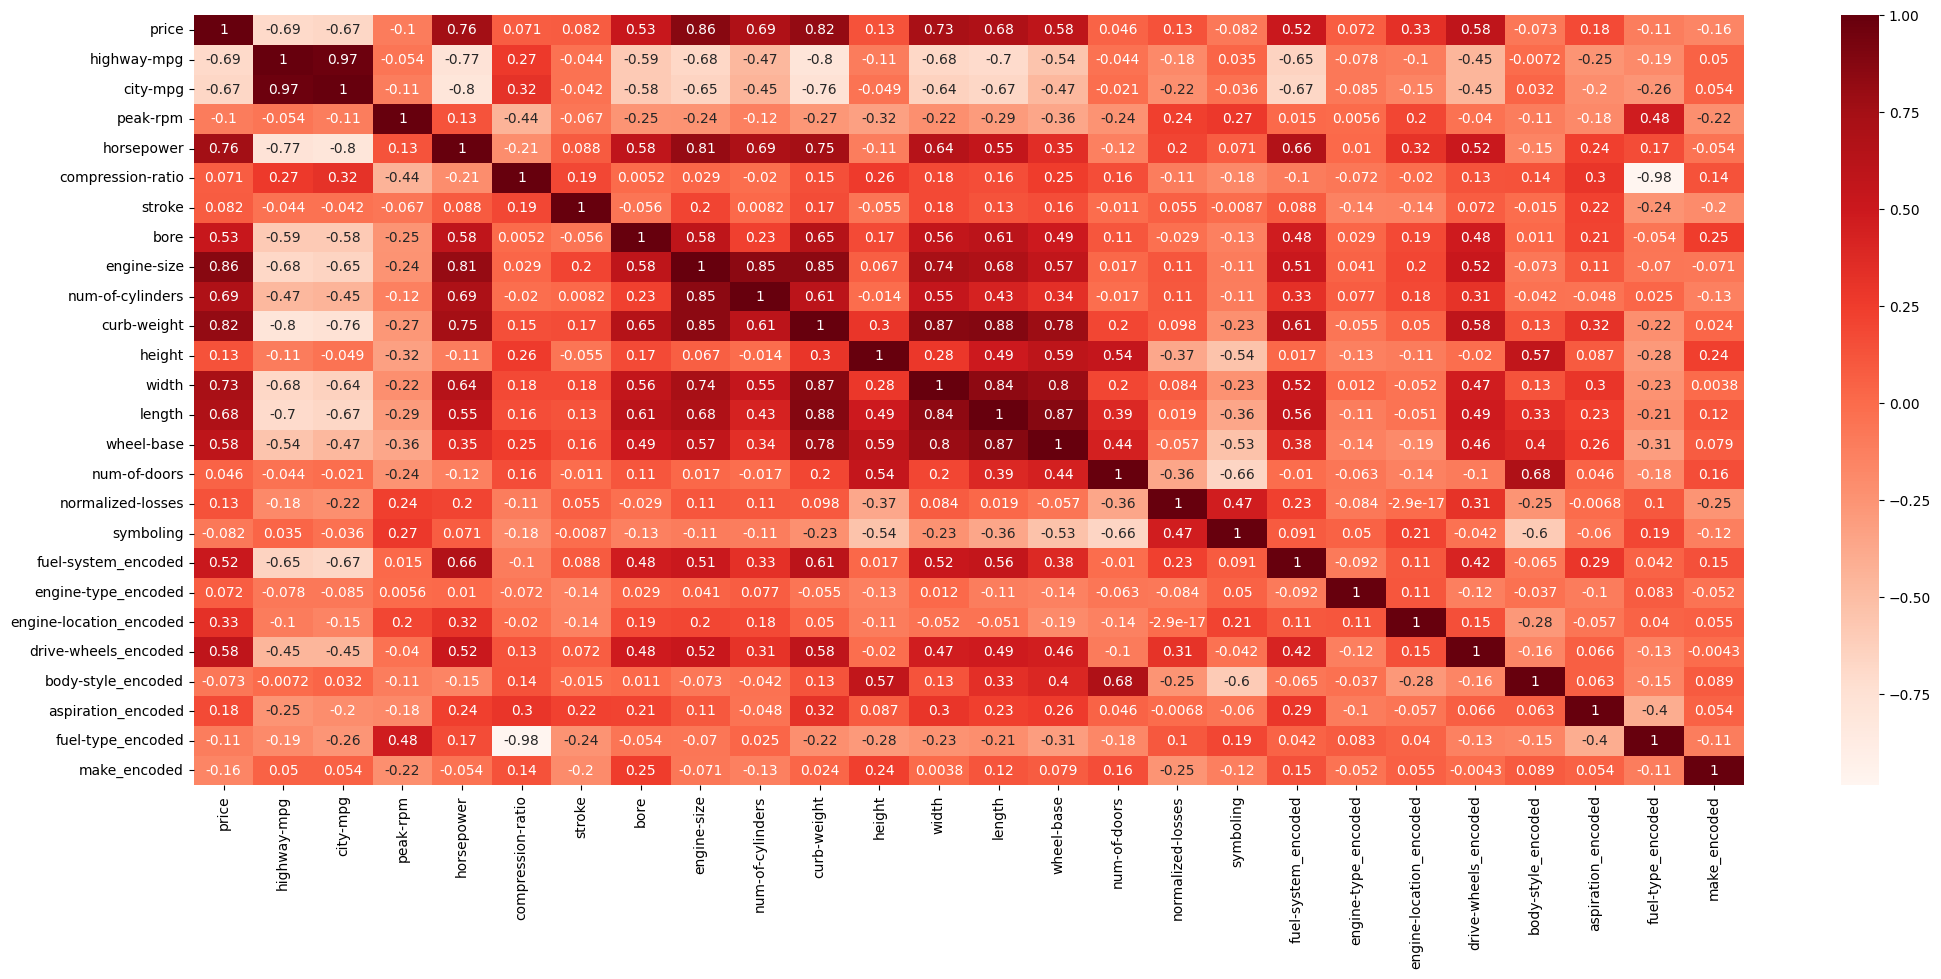

In [15]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

## Exploratory Data Analysis

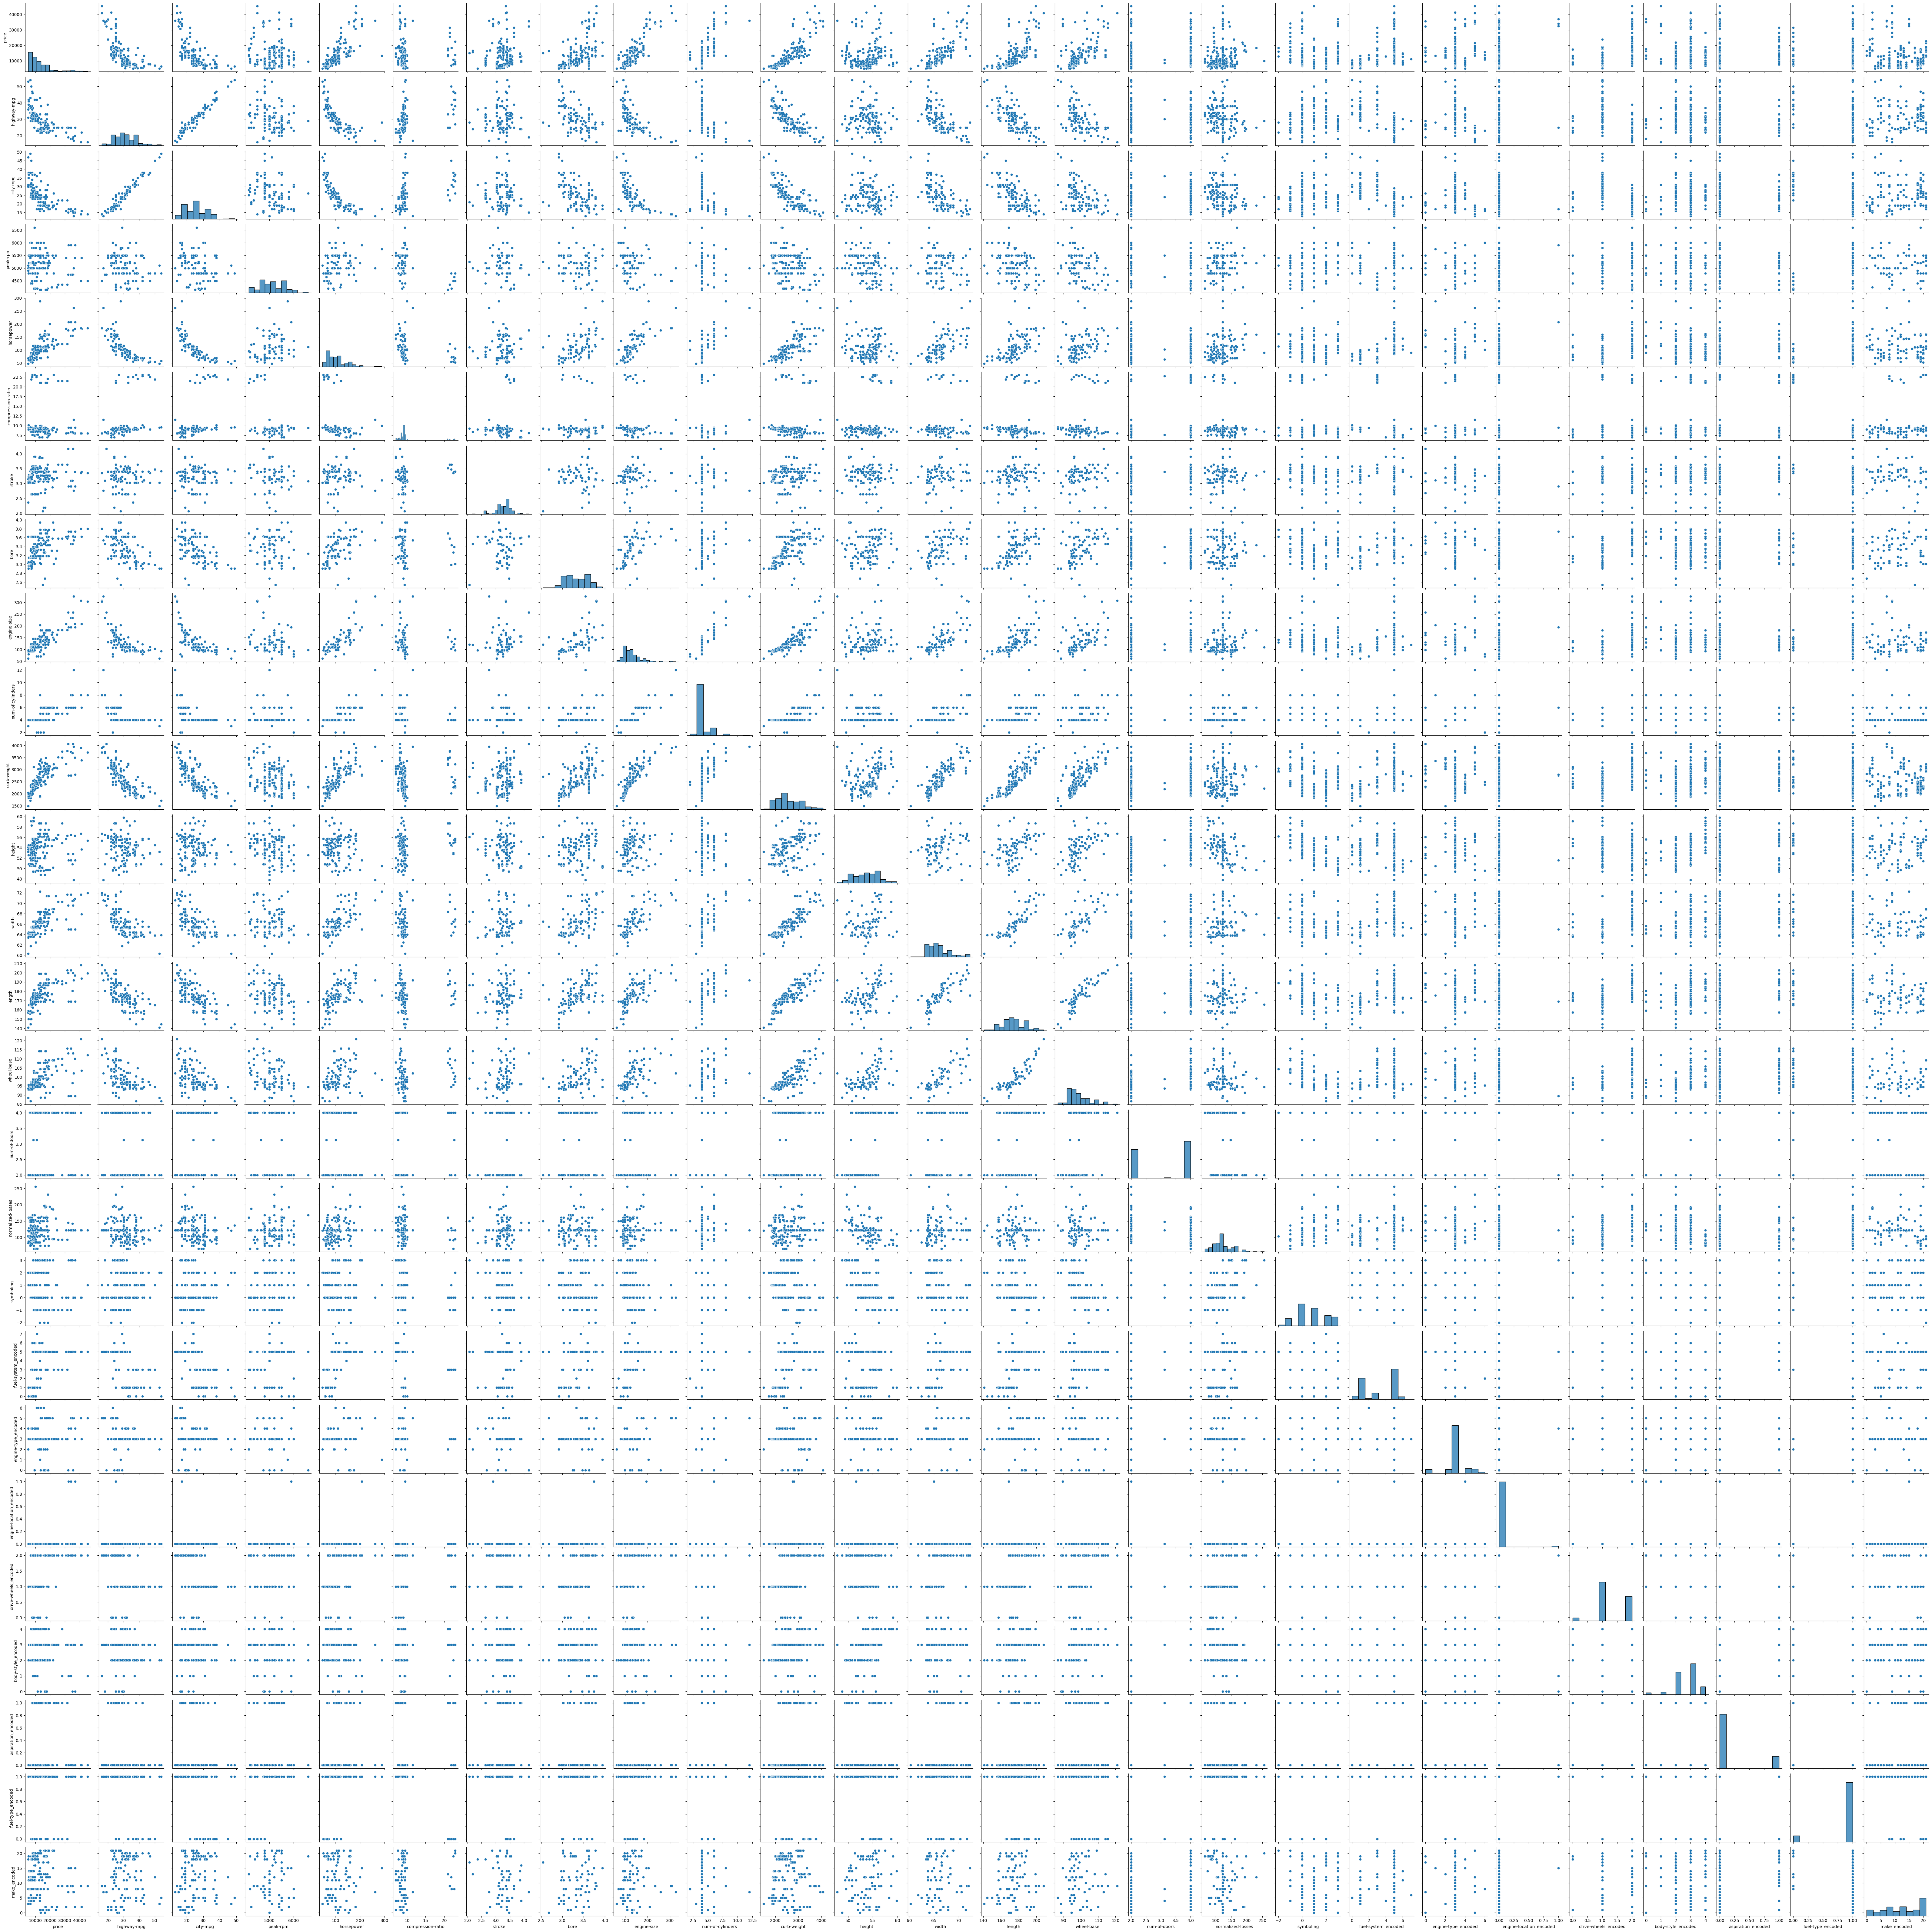

In [16]:
sns.pairplot(df)

## Training a Linear Regression Model
 X and y arrays

In [17]:
X = df.drop('price',axis=1)

y = df['normalized-losses']

In [18]:
print("X-", X.shape, "\ny-", y.shape)

X- (205, 25) 
y- (205,)


## Train Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [20]:
X_train.shape

(143, 25)

In [21]:
X_test.shape

(62, 25)

## Linear Regression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [24]:
model.coef_

array([-2.78263758e-15,  1.47624968e-15, -1.09236736e-16,  2.71685639e-16,
       -1.31928379e-15, -8.49612120e-15,  3.35728726e-14,  4.75795023e-16,
        1.95259003e-15, -1.54871236e-16,  1.38015749e-15, -5.92406309e-16,
       -4.87730338e-16, -6.98331142e-16,  1.11063094e-14,  1.00000000e+00,
        1.32510326e-15, -5.11506256e-16, -3.98484956e-16, -3.35745331e-16,
        2.43758464e-15,  1.28467343e-15,  1.33107585e-15, -2.04532711e-14,
        1.31877948e-16])

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([-2.78263758e-15,  1.47624968e-15, -1.09236736e-16,  2.71685639e-16,
       -1.31928379e-15, -8.49612120e-15,  3.35728726e-14,  4.75795023e-16,
        1.95259003e-15, -1.54871236e-16,  1.38015749e-15, -5.92406309e-16,
       -4.87730338e-16, -6.98331142e-16,  1.11063094e-14,  1.00000000e+00,
        1.32510326e-15, -5.11506256e-16, -3.98484956e-16, -3.35745331e-16,
        2.43758464e-15,  1.28467343e-15,  1.33107585e-15, -2.04532711e-14,
        1.31877948e-16])

In [27]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeffiecients'])

,Coeffiecients
highway-mpg,-2.782638e-15
city-mpg,1.476250e-15
peak-rpm,-1.092367e-16
horsepower,2.716856e-16
compression-ratio,-1.319284e-15
stroke,-8.496121e-15
bore,3.357287e-14
engine-size,4.757950e-16
num-of-cylinders,1.952590e-15
curb-weight,-1.548712e-16


## Prediction from our Model

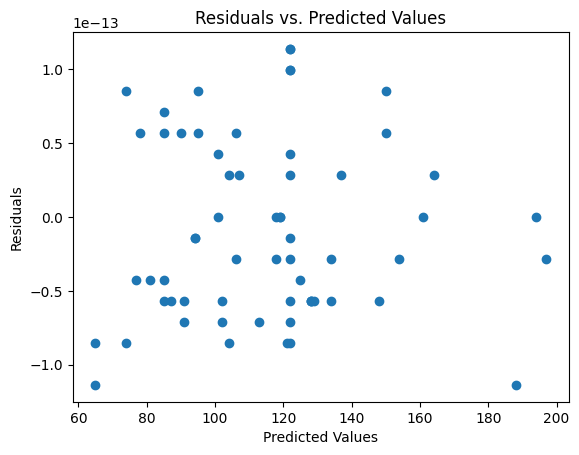

In [41]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

## Regression Evaluation Metrics

In [31]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [32]:
MAE

5.271768684671711e-14

In [33]:
MSE

3.713244622253227e-27

In [34]:
RMSE

6.093639817262937e-14

In [35]:
df['normalized-losses'].mean()

122.0

## Residual Analysis

In [36]:
test_residual = y_test - y_pred

In [37]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)


:Distribution   [Error Values]   (Density)

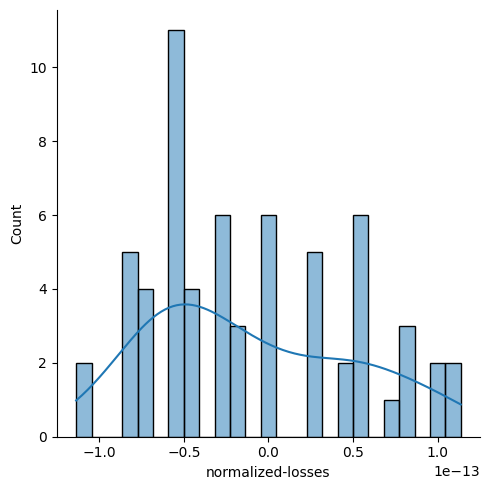

In [38]:
sns.displot(test_residual, bins=25, kde=True)

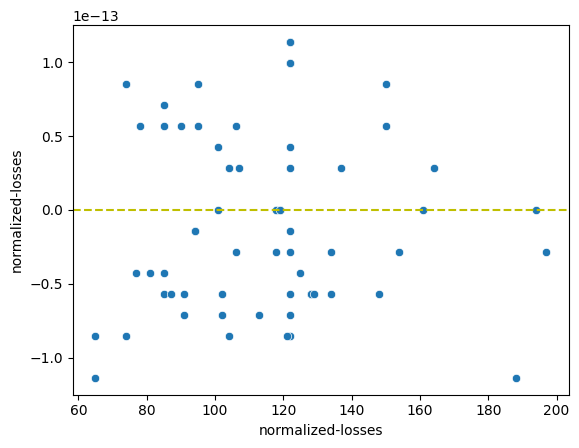

In [39]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='y', ls='--')

## Findings and Results

The results of the linear regression model that I did is that the coefficients for most of the predictor variables are very close to zero, suggesting that these variables have a negligible effect on the response variable. This could indicate that these variables are not significant predictors of the response variable in your model. The only predictor with a significant coefficient is normalized-losses, which is expected since it's the dependent variable.

The extremely small values for MAE, MSE, and RMSE suggest that the model's predictions are very accurate and close to the actual values. This could indicate that the model has captured the underlying patterns in the data very well, or it could be a result of overfitting.